### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [70]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import pandas as pd
import numpy as np
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
import seaborn as sns
from sklearn.cluster import KMeans
vehicle_data = pd.read_csv("vehicle.csv")
vehicle_data .shape

(846, 19)

In [71]:
vehicle_data.describe().transpose()  

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [72]:
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [73]:
vehicle_data.dropna()

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
6             97         43.0                  73.0         173.0   
7             90         43.0                  66.0         157.0   
8             86         34.0                  62.0         140.0   
10            86         36.0                  70.0         143.0   
11            90         34.0                  66.0         136.0   
12            88         46.0                  74.0         171.0   
13            89         42.0                  85.0         144.0   
14            94         49.0                  79.0         203.0   
15            96         55.0                 103.0         201.0   
16            89         36.0                  51.0         109.0   
17            99         41.0                  77.0         197.0   
18           104         54.0                 100.0         186.0   
20            84         47.0                  75.0         153.0   
21            84         37.0                  53.0         121.0   
22            94         43.0                  64.0         173.0   
23            87         39.0                  70.0         148.0   
24            99         53.0                 105.0         219.0   
25            85         45.0                  80.0         154.0   
26            83         36.0                  54.0         119.0   
27           107         54.0                  98.0         203.0   
28           102         45.0                  85.0         193.0   
29            80         38.0                  63.0         129.0   
30            89         43.0                  85.0         160.0   
31            88         42.0                  77.0         151.0   
32            93         35.0                  66.0         154.0   
..           ...          ...                   ...           ...   
816           90         48.0                  85.0         157.0   
817          104         53.0                 108.0         204.0   
818           95         43.0                  96.0         202.0   
819           93         42.0                  98.0         192.0   
820           87         38.0                  71.0         123.0   
821          104         56.0                  96.0         231.0   
822           95         41.0                  82.0         170.0   
823          105         54.0                 105.0         213.0   
824          106         55.0                  96.0         196.0   
825           86         39.0                  84.0         149.0   
826           95         49.0                  92.0         193.0   
827           99         57.0                 100.0         177.0   
828           89         42.0                  66.0         125.0   
829           95         49.0                  82.0         139.0   
830           97         37.0                  70.0         173.0   
831          100         47.0                  70.0         185.0   
832          108         49.0                 109.0         204.0   
833           92         46.0                  83.0         154.0   
834           82         36.0                  51.0         114.0   
835          111         58.0                 105.0         183.0   
836           87         45.0                  66.0         139.0   
837           94         46.0                  77.0         169.0   
838           95         43.0                  76.0         142.0   
839           90         44.0                  72.0         157.0   
840           93         34.0                  66.0         140.0   
841           93         39.0                  87.0         183.0   
842

In [74]:
vehicle_data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [75]:
vehicle_data.groupby(["class"]).count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          214                   215           216   
car            429          428                   429           426   
van            199          199                   198           198   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     217                      218            218   
car                     428                      429            428   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     217                        218   
car              428                     428                        429   
van              199                     198                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        216   
car                427                427                        429   
van                198                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            217             214               218   
car                            426             427               428   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 428            429  
van                 199            199

In [76]:
cleanup_nums = {"bus": 1, "car": 0, "van": 2}
vehicle_data.replace(cleanup_nums, inplace=True)

In [77]:
#vehicle_data['class'] = vehicle_data.class.astype('category')

In [78]:
vehicle_data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                            int64
dtype: object

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


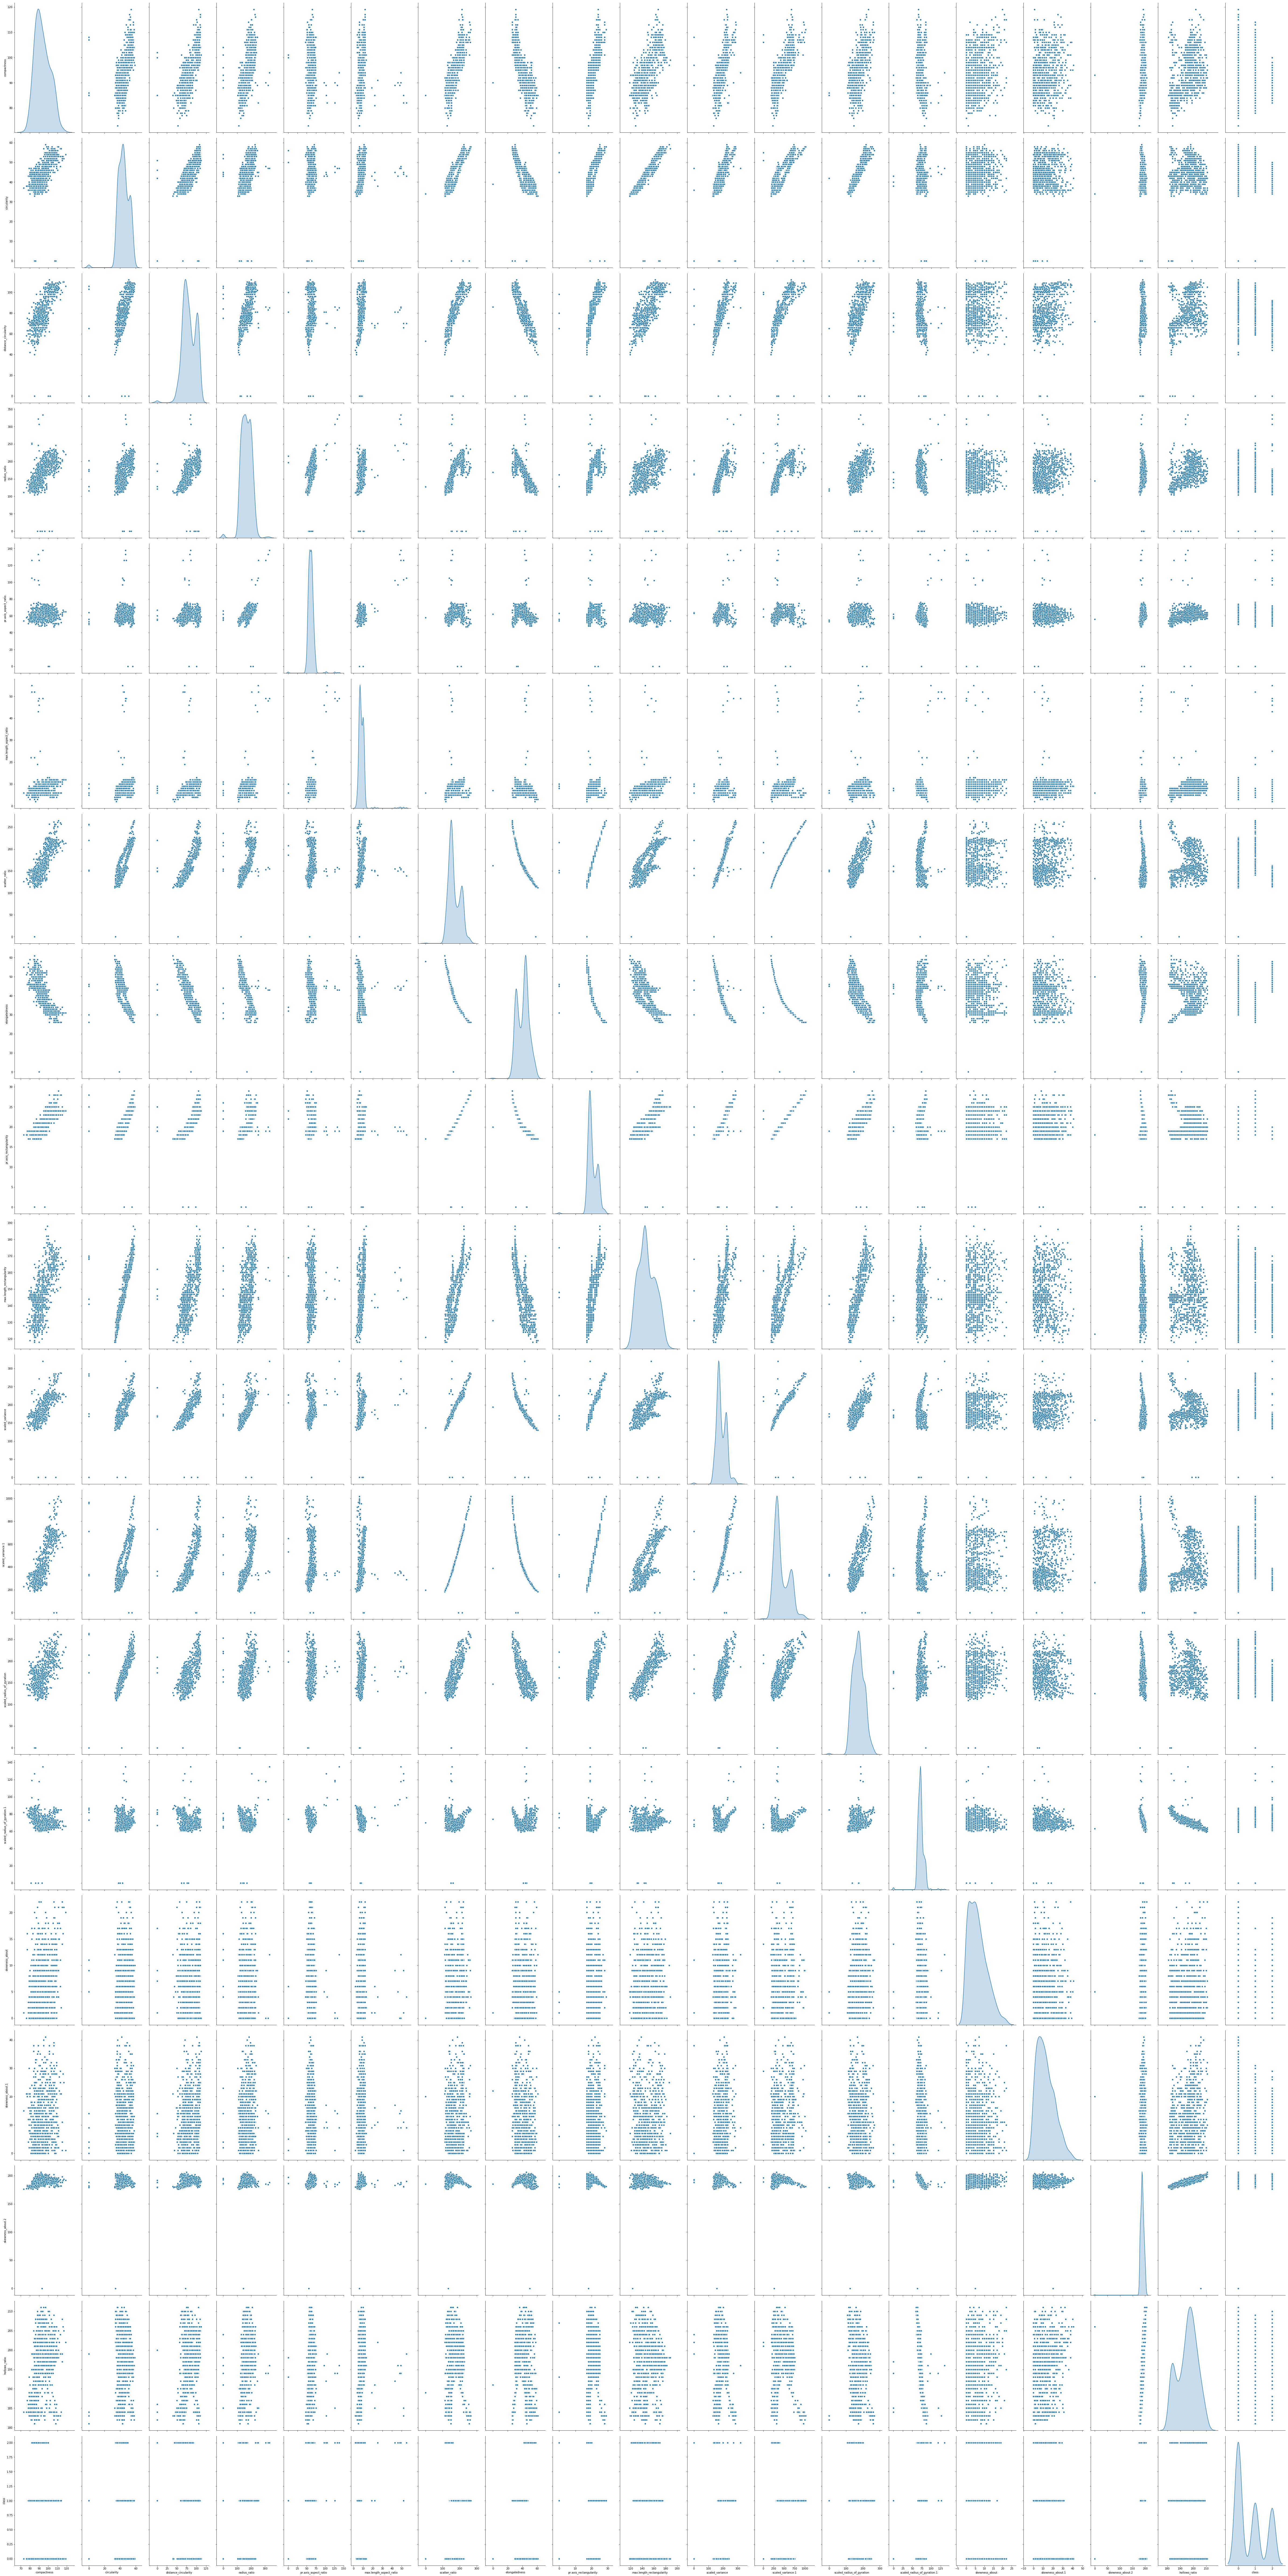

In [98]:
sns.pairplot(vehicle_data, size=7,aspect=0.5 , diag_kind='kde')

### Check for any missing values in the data 

In [79]:
vehicle_data.isnull().values.any()

True

In [80]:
print(vehicle_data.isnull().sum())

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [81]:
print(vehicle_data.isnull().sum().sum())

41


In [82]:
vehicle_data.fillna(0, inplace=True)

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [83]:
from scipy.stats import zscore
vehicle_data_z = vehicle_data.apply(zscore)

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [84]:
import seaborn as sns

from sklearn import metrics

In [85]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [86]:
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vehicle_data_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(vehicle_data_z, labels, metric='euclidean'))

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

num_clusters  cluster_errors  Avg Sil Score
0             2    10220.206879       0.364435
1             3     8906.917088       0.246640
2             4     7676.916801       0.258374
3             5     7043.124904       0.235655
4             6     6600.572949       0.230095
5             7     6235.378973       0.222663
6             8     5794.304734       0.219498
7             9     5667.363509       0.192581

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

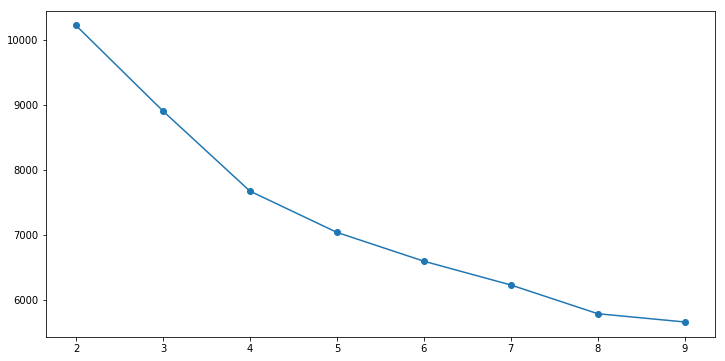

In [87]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [88]:
# The elbow plot shows that 4 might be a good choice for K 

In [89]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
#cluster = KMeans( n_clusters = 5)
cluster.fit(vehicle_data_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [91]:
centroids = cluster.cluster_centers_
centroids

array([[-7.35574330e-01,  9.76387372e-02, -2.37721245e-01,
         2.76945158e+00,  6.49248185e+00,  8.84694040e+00,
        -5.29319147e-01,  4.71427340e-01, -4.83814106e-01,
         2.75809107e-01,  1.60108357e+00, -5.80274271e-01,
         2.03130544e-01,  4.17016935e+00, -2.67615650e-01,
        -2.19613721e-01, -4.55341058e-01, -4.38150738e-01,
         1.24989882e+00],
       [-9.23232745e-01, -5.19738884e-01, -8.92889145e-01,
        -1.02684399e+00, -5.35964764e-01, -3.25061736e-01,
        -8.17736475e-01,  9.14168036e-01, -7.07863993e-01,
        -5.46926555e-01, -7.70850695e-01, -8.00273055e-01,
        -4.73882981e-01,  6.46130772e-01, -8.35602715e-02,
        -2.74664630e-01, -7.39911761e-01, -1.05700453e+00,
         4.01584127e-01],
       [ 1.14769873e+00,  1.01709498e+00,  1.14226487e+00,
         8.70892978e-01,  4.34018829e-02,  2.16249349e-01,
         1.27914099e+00, -1.18620067e+00,  1.16614788e+00,
         1.09757038e+00,  1.15469858e+00,  1.27665088e+00,
    

### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [92]:

centroid_df = pd.DataFrame(centroids, columns = list(vehicle_data_z) )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.735574     0.097639             -0.237721      2.769452   
1    -0.923233    -0.519739             -0.892889     -1.026844   
2     1.147699     1.017095              1.142265      0.870893   
3    -0.221639    -0.444118             -0.252775     -0.000083   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              6.492482                 8.846940      -0.529319   
1             -0.535965                -0.325062      -0.817736   
2              0.043402                 0.216249       1.279141   
3              0.214833                -0.148293      -0.416401   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.471427               -0.483814                   0.275809   
1       0.914168               -0.707864                  -0.546927   
2      -1.186201                1.166148                   1.097570   
3       0.266967               -0.408485                  -0.494179   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         1.601084          -0.580274                   0.203131   
1        -0.770851          -0.800273                  -0.473883   
2         1.154699           1.276651                   1.065455   
3        -0.402298          -0.426489                  -0.521915   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     4.170169       -0.267616         -0.219614   
1                     0.646131       -0.083560         -0.274665   
2                    -0.039298        0.175355          0.262434   
3                    -0.566902       -0.074167         -0.000607   

   skewness_about.2  hollows_ratio     class  
0         -0.455341      -0.438151  1.249899  
1         -0.739912      -1.057005  0.401584  
2          0.031463       0.179423 -0.666143  
3          0.553375       0.674106  0.211356

In [96]:
prediction=cluster.predict(vehicle_data_z)
vehicle_data_z["GROUP"] = prediction

### Use kmeans.labels_ function to print out the labels of the classes

In [97]:
vehicle_data_z.groupby("GROUP").count()

compactness  circularity  distance_circularity  radius_ratio  \
GROUP                                                                 
0                8            8                     8             8   
1              248          248                   248           248   
2              267          267                   267           267   
3              323          323                   323           323   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
GROUP                                                                 
0                         8                        8              8   
1                       248                      248            248   
2                       267                      267            267   
3                       323                      323            323   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
GROUP                                                                     
0                  8                       8                          8   
1                248                     248                        248   
2                267                     267                        267   
3                323                     323                        323   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
GROUP                                                                  
0                    8                  8                          8   
1                  248                248                        248   
2                  267                267                        267   
3                  323                323                        323   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
GROUP                                                                  
0                                8               8                 8   
1                              248             248               248   
2                              267             267               267   
3                              323             323               323   

       skewness_about.2  hollows_ratio  class  
GROUP                                          
0                     8              8      8  
1                   248            248    248  
2                   267            267    267  
3                   323            323    323

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [99]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')
model.fit(vehicle_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=6,
            pooling_func=<function mean at 0x00000000052B4268>)

In [111]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [142]:
combined = np.concatenate((a, b, c))

In [138]:
combined

array([[ 1.09988700e+01,  9.67395292e-01],
       [ 9.30446491e+00, -1.61070645e+00],
       [ 9.73423198e+00, -1.21230529e+00],
       [ 7.51737305e+00,  9.66748642e-01],
       [ 1.18724605e+01,  1.44983709e+00],
       [ 7.75282866e+00, -9.99030928e-02],
       [ 1.39458559e+01, -1.44014952e+00],
       [ 7.74299138e+00, -2.56028950e+00],
       [ 9.34082425e+00,  1.07121101e+00],
       [ 1.08625984e+01,  2.38278557e+00],
       [ 7.75694964e+00,  2.10981510e+00],
       [ 1.28326748e+01,  8.57745262e-01],
       [ 9.49406671e+00,  5.75039923e-01],
       [ 9.80469503e+00, -1.74473677e+00],
       [ 8.66634033e+00,  2.29092656e+00],
       [ 1.32364981e+01,  4.14464663e+00],
       [ 1.27895195e+01, -1.93901733e-01],
       [ 9.73922701e+00,  1.71352376e+00],
       [ 6.93640765e+00, -4.33304864e+00],
       [ 1.06376631e+01,  1.62085183e+00],
       [ 1.24660260e+01, -5.47257266e-01],
       [ 1.03585838e+01,  3.48922390e-01],
       [ 1.13718833e+01,  1.57589564e+00],
       [ 1.

In [143]:
df1=pd.DataFrame(combined)

In [145]:
df1.shape

(250, 2)

In [147]:
df1.head()

0         1
0  10.998870  0.967395
1   9.304465 -1.610706
2   9.734232 -1.212305
3   7.517373  0.966749
4  11.872461  1.449837

### 10. Use scatter matrix to print all the 3 distributions

C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


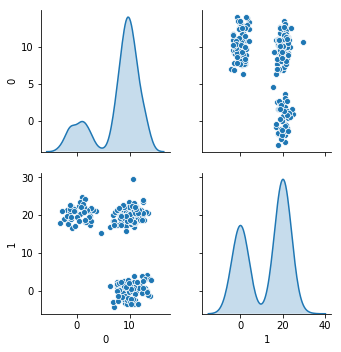

In [148]:
sns.pairplot(df1, diag_kind='kde')

### 11. Find out the linkage matrix

In [149]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')
model.fit(df1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=6,
            pooling_func=<function mean at 0x00000000052B4268>)

Use ward as linkage metric and distance as Eucledian

In [151]:
df1['labels'] = model.labels_

df1.groupby(["labels"]).count()

0    1
labels          
0       100  100
1        11   11
2        50   50
3         1    1
4         2    2
5        86   86

In [155]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
Z = linkage(df1, 'ward')
c, coph_dists = cophenet(Z , pdist(df1))

c

0.9603602297650882

### 12. Plot the dendrogram for the consolidated dataframe

In [153]:
Z.shape

Z[1]
Z[1:10]

array([[8.00000000e+00, 9.70000000e+01, 4.91786787e-02, 2.00000000e+00],
       [0.00000000e+00, 5.60000000e+01, 5.00633765e-02, 2.00000000e+00],
       [9.00000000e+00, 3.80000000e+01, 5.80876640e-02, 2.00000000e+00],
       [2.25000000e+02, 2.27000000e+02, 7.03078609e-02, 2.00000000e+00],
       [1.79000000e+02, 2.17000000e+02, 7.83971424e-02, 2.00000000e+00],
       [1.16000000e+02, 1.17000000e+02, 8.78220059e-02, 2.00000000e+00],
       [3.40000000e+01, 6.40000000e+01, 9.45822171e-02, 2.00000000e+00],
       [7.90000000e+01, 9.00000000e+01, 1.06130352e-01, 2.00000000e+00],
       [2.05000000e+02, 2.13000000e+02, 1.06629542e-01, 2.00000000e+00]])

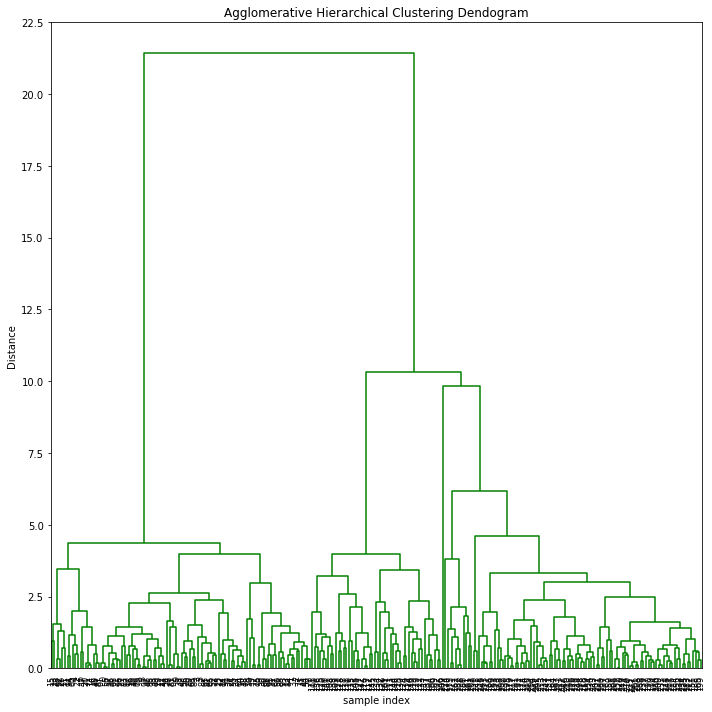

In [154]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

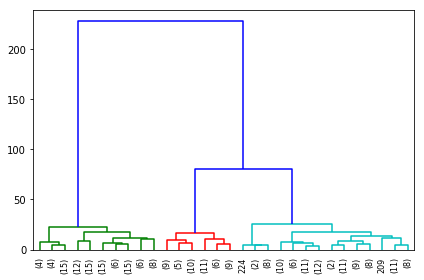

In [156]:
dendrogram(Z, leaf_rotation=90.,truncate_mode='lastp' ,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 